# 1. Load and Prepare Data

In [1]:
%matplotlib
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

city = pd.read_csv('city_data.csv')
ride = pd.read_csv('ride_data.csv')

city_ride = pd.merge(ride, city, how='left', on=['city'])
city_ride = city_ride[['city','fare','ride_id','driver_count','type']]
city_ride.head()

Using matplotlib backend: Qt5Agg


,city,fare,ride_id,driver_count,type
0,Lake Jonathanshire,13.83,5739410935873,5,Urban
1,South Michelleport,30.24,2343912425577,72,Urban
2,Port Samanthamouth,33.44,2005065760003,57,Urban
3,Rodneyfort,23.44,5149245426178,34,Urban
4,South Jack,34.58,3908451377344,46,Urban


# 2. Ride Sharing Data
- Average Fare Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type (Urban, Suburban, Rural)

In [2]:
#Create dataframe for each type of city
urban_df = city_ride[city_ride['type'] == 'Urban'].set_index('city')
suburb_df = city_ride[city_ride['type'] == 'Suburban'].set_index('city')
rural_df = city_ride[city_ride['type'] == 'Rural'].set_index('city')

#Put all types into a list
city_type = []
city_type.extend([urban_df,suburb_df,rural_df])

#Create a df that group our city_type dataframes by city and add calculated fields
for df in city_type:
    #Calculated fields: Average Fare, Total Number of Rides, and Drivers per City,
    df['Average Fare'] = df.groupby('city')['fare'].mean() 
    df['Total Number of Rides Per City'] = df.groupby('city')['ride_id'].count()
    df['Total Drivers Per City'] = df.groupby('city')['driver_count'].sum()
    #Group each dataframe by city
    df.reset_index(inplace=True)
    df.drop_duplicates(subset='city', inplace=True)
    df.set_index('city', inplace=True)
    #Check the resultant dataframes 
    df.info()   
    print('----------------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, Lake Jonathanshire to West Gabriel
Data columns (total 7 columns):
fare                              66 non-null float64
ride_id                           66 non-null int64
driver_count                      66 non-null int64
type                              66 non-null object
Average Fare                      66 non-null float64
Total Number of Rides Per City    66 non-null int64
Total Drivers Per City            66 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 4.1+ KB
----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Barronchester to East Danielview
Data columns (total 7 columns):
fare                              36 non-null float64
ride_id                           36 non-null int64
driver_count                      36 non-null int64
type                              36 non-null object
Average Fare                      36 non-null float64

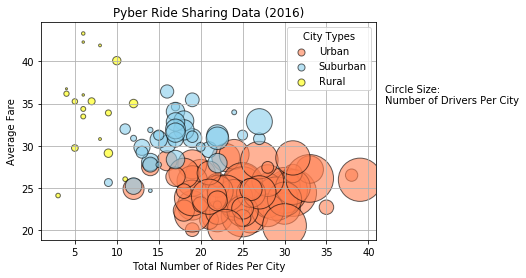

In [3]:
#Bubble plot showing all the relationships
fig, ax = plt.subplots(1)
alpha = 0.6
colors = 'coral','skyblue','yellow'

for df, color in zip(city_type, colors):
    df.plot.scatter(ax = ax, x = 'Total Number of Rides Per City', 
                    y = 'Average Fare', s = df['Total Drivers Per City'], 
                    c = color, edgecolor='black', 
                    alpha = alpha, label = df['type'][0],
                    title = 'Pyber Ride Sharing Data (2016)', grid = True)
    
plt.text(42,35,'Circle Size: \nNumber of Drivers Per City')
lgnd = plt.legend(title = 'City Types', scatterpoints=1, fontsize=10)
for dot in lgnd.legendHandles: dot._sizes = [50]

plt.show()

# 3. Total Fares by City Type

In [4]:
#Percentage of Total Fares
fare_df = city_ride.set_index('type')
total_fare = city_ride['fare'].sum()
each_type_fare = city_ride.groupby('type')['fare'].sum()
fare_df['% Total Fares'] = each_type_fare/total_fare * 100
fare_df = fare_df.reset_index().drop_duplicates(subset='type').set_index('type')
fare_df

,city,fare,ride_id,driver_count,% Total Fares
type,,,,,
Urban,Lake Jonathanshire,13.83,5739410935873,5,62.724635
Suburban,Barronchester,27.79,6653622887913,11,30.463872
Rural,Randallchester,43.22,1076079536213,9,6.811493


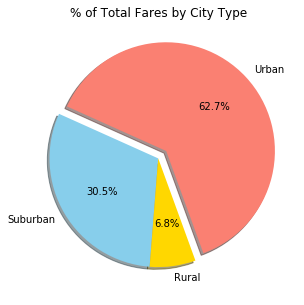

In [5]:
#Pie Chart
explode = (0.1, 0, 0)
fare_df.plot.pie(y = '% Total Fares', explode = explode, 
                 autopct = '%1.1f%%', legend = False,
                 shadow = True, startangle = 290,
                 colors = ['salmon','skyblue','gold'],
                 figsize = (5,5), title='% of Total Fares by City Type')

plt.ylabel('')
plt.show()

# 4. Total Rides by City Type

In [6]:
#Percentage of Total Rides
ride_df = city_ride.set_index('type')
total_ride = city_ride['ride_id'].count()
each_type_ride = city_ride.groupby('type')['ride_id'].count()
ride_df['% Total Rides'] = each_type_ride/total_ride * 100
ride_df = ride_df.reset_index().drop_duplicates(subset='type').set_index('type')
ride_df

,city,fare,ride_id,driver_count,% Total Rides
type,,,,,
Urban,Lake Jonathanshire,13.83,5739410935873,5,68.421053
Suburban,Barronchester,27.79,6653622887913,11,26.315789
Rural,Randallchester,43.22,1076079536213,9,5.263158


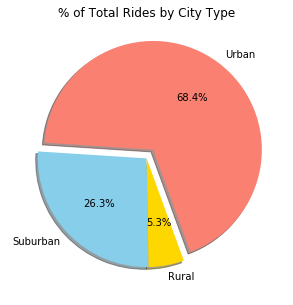

In [7]:
#Pie Chart
explode = (0.1, 0, 0)
ride_df.plot.pie(y = '% Total Rides', explode = explode, 
                 autopct = '%1.1f%%', legend = False,
                 shadow = True, startangle = 290,
                 colors = ['salmon','skyblue','gold'],
                 figsize=(5,5), title='% of Total Rides by City Type')

plt.ylabel('')
plt.show()

# 5. Total Drivers by City Type

In [8]:
driver_df = city_ride.drop_duplicates(subset='city').set_index('type')
total_driver = driver_df['driver_count'].sum()
each_type_driver = driver_df.groupby('type')['driver_count'].sum()
driver_df['% Total Drivers'] = each_type_driver/total_driver * 100
driver_df = driver_df.reset_index().drop_duplicates(subset='type').set_index('type')
driver_df

,city,fare,ride_id,driver_count,% Total Drivers
type,,,,,
Urban,Lake Jonathanshire,13.83,5739410935873,5,80.894719
Suburban,Barronchester,27.79,6653622887913,11,16.481668
Rural,Randallchester,43.22,1076079536213,9,2.623613


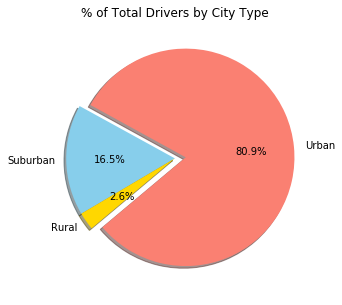

In [9]:
explode = (0.1, 0, 0)
driver_df.plot.pie(y = '% Total Drivers', explode = explode,
                   autopct = '%1.1f%%', legend = False,
                   shadow = True, startangle = 220,
                   colors = ['salmon','skyblue','gold'],
                   figsize=(5,5), title='% of Total Drivers by City Type')

plt.ylabel('')
plt.show()